<div style="color: black; background-color: red;border: 2px solid pink; border-radius: 20px;">
  <h1 style="padding-top: 14px; text-align: center;">Video Game Sales</h1>
</div>


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

games_df = pd.read_csv('datasets\\video_games_sales.csv', sep=',')


In [3]:
games_df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<div style="color: black; background-color: orange; width: 50%;border: 2px solid yellow; border-radius: 20px;">
  <h3 style="padding-top: 14px; text-align: center;">How many different platforms are there?</h3>
</div>


In [4]:
len(games_df['platform'].unique())

31

<div style="color: black; background-color: orange; width: 50%;border: 2px solid yellow; border-radius: 20px;">
  <h3 style="padding-top: 14px; text-align: center;">How many different publishers are there?</h3>
</div>


In [5]:
len(games_df['publisher'].unique())

579

<div style="background-color: #e7000c; width: 50%; border-radius: 20px; text-align: center;">
  <h3 style="color: white;">Top 5 selling titles by Nintendo:</h3>
  <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Nintendo.svg/600px-Nintendo.svg.png' width='270px' height='80px'/>
</div>

In [6]:
games_df[games_df['publisher'] == 'Nintendo'].sort_values(by=['global_sales'], ascending=False)[0:5]

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<div style="color: black; background-color: orange; width: 50%;border: 2px solid yellow; border-radius: 20px;">
  <h3 style="padding-top: 14px; text-align: center;">Top 5 Publishers by total global sales:</h3>
</div>

In [7]:
games_df.groupby('publisher')['global_sales'].sum().reset_index().sort_values(by=['global_sales'], ascending=False)[0:5]


,publisher,global_sales
359,Nintendo,1786.56
138,Electronic Arts,1110.32
21,Activision,727.46
456,Sony Computer Entertainment,607.50
525,Ubisoft,474.72


<div style="color: black; background-color: orange; width: 50%;border: 2px solid yellow; border-radius: 20px;">
  <h3 style="padding-top: 14px; text-align: center;">Top 5 Publishers by total global sales</h3>
  <h4 style="text-align: center;">Showing the total releases and order highest to lowest</h4>
</div>

In [8]:
games_df.groupby('publisher').agg({
  'global_sales': 'sum',
  'name': 'count'
}).reset_index().rename(columns={'name': 'game_count'}).sort_values(by=['global_sales'], ascending=False)[0:5].sort_values(by=['game_count'], ascending=False)

,publisher,global_sales,game_count
138,Electronic Arts,1110.32,1351
21,Activision,727.46,975
525,Ubisoft,474.72,921
359,Nintendo,1786.56,703
456,Sony Computer Entertainment,607.50,683


<div style="color: black; background-color: orange; width: 50%;border: 2px solid yellow; border-radius: 20px;">
  <h3 style="padding-top: 14px; text-align: center;">Top 5 Platforms based on no. of releases</h3>
</div>

In [18]:
games_df.groupby('platform')['name'].count().reset_index().rename(columns={'name': 'game_count'}).sort_values(by=['game_count'], ascending=False)[0:5]

,platform,game_count
4,DS,2131
16,PS2,2127
17,PS3,1304
26,Wii,1290
28,X360,1234


<div style="color: black; background-color: orange; width: 50%;border: 2px solid yellow; border-radius: 20px;">
  <h3 style="padding-top: 14px; text-align: center;">Top 5 Publishers By Total No. Of Releases</h3>
</div>

In [9]:
games_df.groupby('publisher')['name'].count().reset_index().rename(columns={'name': 'game_count'}).sort_values(by=['game_count'], ascending=False)[0:5]

,publisher,game_count
138,Electronic Arts,1351
21,Activision,975
347,Namco Bandai Games,932
525,Ubisoft,921
275,Konami Digital Entertainment,832


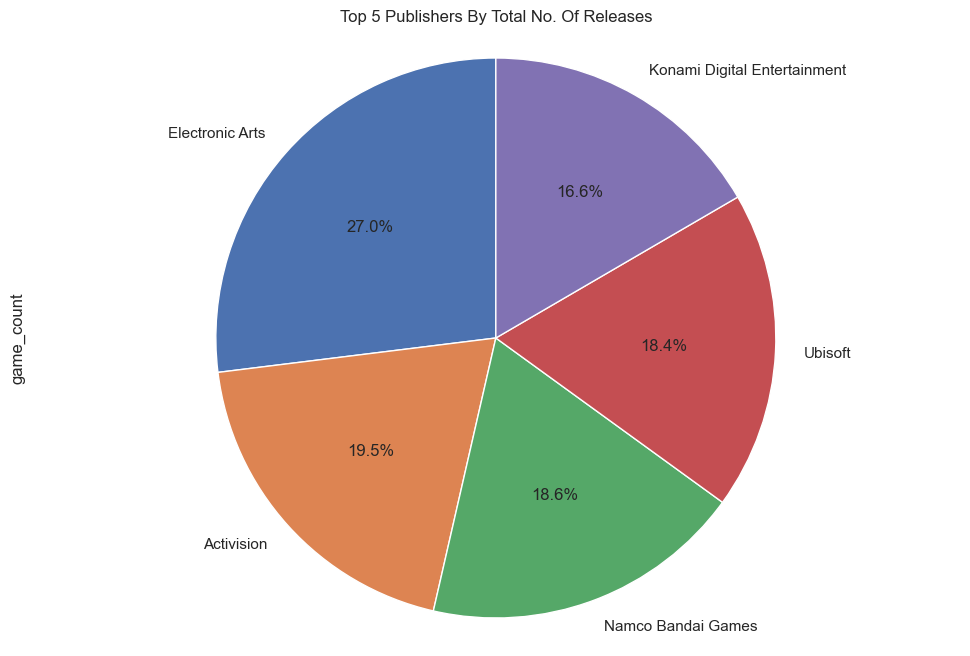

In [11]:
fig, axs = plt.subplots(nrows=1,
                        ncols=1,
                        figsize=(12,8))
pie_data = games_df.groupby('publisher')['name'].count().reset_index().rename(columns={'name': 'game_count'}).sort_values(by=['game_count'], ascending=False)[0:5]
pie_data['game_count'].plot(kind='pie', labels=pie_data['publisher'], autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Publishers By Total No. Of Releases')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<div style="color: white; background-color: blue; width: 20%; border: 2px solid black; border-radius: 10px;">
  <h5 style="padding-top: 14px; text-align: center;">Data prepping</h5>
</div>

In [12]:
games_df = games_df.dropna().drop(['eu_sales', 'jp_sales', 'other_sales', 'rank'], axis=1)

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
for x in games_df.keys():
    if x in ['name', 'year', 'global_sales', 'na_sales']:
        print("SKIIIIIP")
    else:
        games_df[f'{x}_enc'] = le.fit_transform(games_df[x])

SKIIIIIP
SKIIIIIP
SKIIIIIP
SKIIIIIP


<div style="color: black; background-color: orange; width: 50%;border: 2px solid yellow; border-radius: 20px;">
  <h3 style="padding-top: 14px; text-align: center;">Can the Global sales be predicted from the:</h3>
  <h4 style="text-align: center;">Platform, Genre, Publisher and NA sales</h4>
</div>

(-0.05000000000000002, 1.0500000000000003)

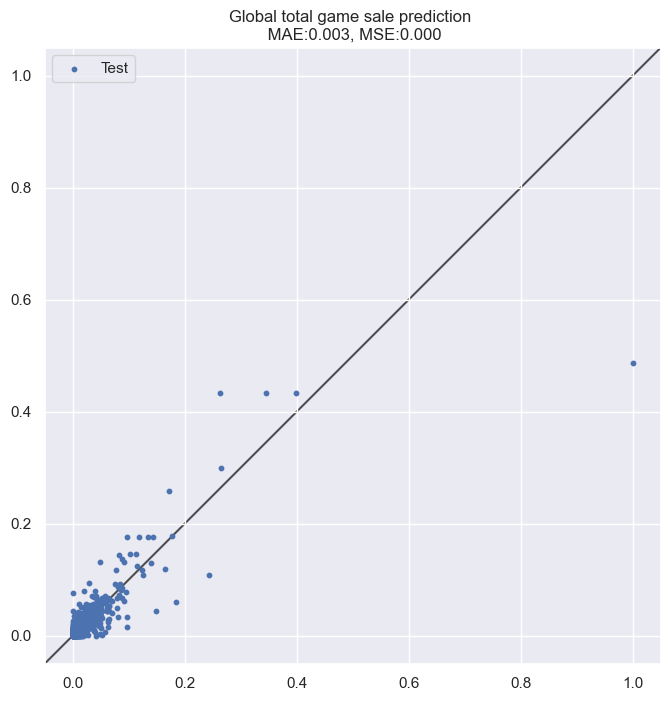

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sales = games_df['global_sales'].to_numpy()
sales = sales.reshape(-1, 1)
games_df['golbal_sales_sc'] = MinMaxScaler().fit_transform(sales)

from sklearn.model_selection import train_test_split
train, test = train_test_split(games_df, random_state=42)
X_train = train[['na_sales', 'year', 'platform_enc', 'genre_enc', 'publisher_enc']]
X_test = test[['na_sales', 'year', 'platform_enc', 'genre_enc', 'publisher_enc']]
Y_train = train['golbal_sales_sc']
Y_test = test['golbal_sales_sc']

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
DTR = DecisionTreeRegressor(max_depth=600, random_state=42)
DTR.fit(X_train, Y_train)

Y_pred = DTR.predict(X_test)
ys_mae = mean_absolute_error(Y_test,Y_pred)
ys_mse = mean_squared_error(Y_test,Y_pred)
fig, ax = plt.subplots(1,1,figsize=(12,8))

ax.scatter(Y_test,Y_pred, s=10, label='Test')
ax.set_title(f'Global total game sale prediction \n MAE:{ys_mae:.3f}, MSE:{ys_mse:.3f}')
ax.legend()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)